# The Summer Olympics (2000 - 2016) Exploratory Data Analysis:
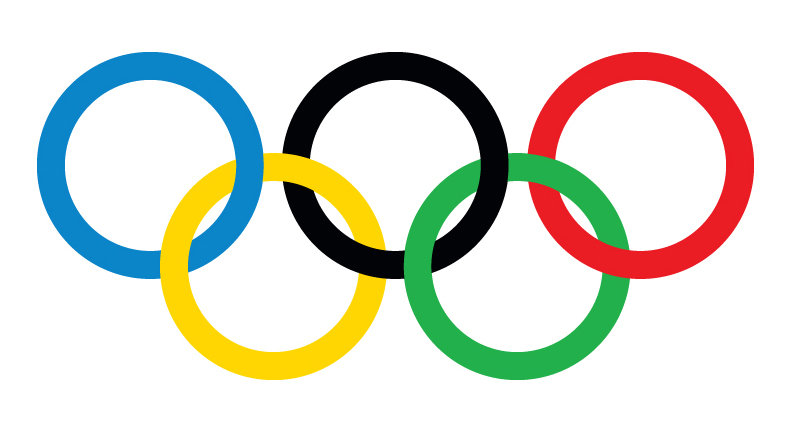

## 1. Introduction:

This Exploratory Data Analysis (EPA) is based on the data from The Summer Olympics between 2000 and 2016. This EPA is being completed to gain an understanding and insight into various aspects of the Summer Olympics throughout this time period. Although the Summer Olympics has been going on for much longer than the selected timeframe, this EPA is limited to the requirement of the data being 10mb or less in size. In total, there were 5 Summer Olympics, which happened in years 2000, 2004, 2008, 2012, 2016.


## 1.1 Aims and Objectives:

This EPA looks to delve into the various aspects such as:

Age, Weight and Height Distribution <br>
Participants<br>
Countries<br>
Gold Medal Distribution<br>
Silver Medal Distribution<br>
Bronze Medal Distribution<br>

Along with the aforementioned, this EPA looks to answer a few questions set forth, namely:

1)	Which country won the greatest number of medals?<br>
2)	How many Gold, Silver and Bronze Medals did athletes Aged 40 and Over win?<br> 
3)  In which disciplines did these athletes win their medals?<br>
4)	What was the split between Male and Female athletes in the Summer Olympics for this time period?<br>


## 1.2 Project Background:

Scope: 

I will analyse the questions mentioned above, namely which countries have won the greatest number of medals, how many gold, silver and bronze medals did athletes aged 40 and over win, which disciplines these athletes won medals and what the split was between male and female athletes in the timeframe for the Summer Olympics 2000 - 2016. 

This scope will not include looking at the metrics pertinent to the specific discplines, the metrics specific to athletes and the data surrounding events at the olympics. 

Evaluation of aims:

This EPA will be evaluated based on the following criteria: 

Question 1 - Analysis of the countries medal count in total. By using pandas and numpy to calculate the total amount of medals grouped by each country and evaluate the top 5 countries.

Question 2 - Analysis of Gold, Silver and Bronze Medals won by athletes who's age was 40 and over at the time of the olympic year. 

Question 3 - Analysis of the event categories for the medal won by the athlete aged 40 and over. Collection of the categories and display in the form of a bar graph to view the total number of medals won per discipline. 

Question 4 - Analysis of the amount of Male and Female athletes per olympics games held. Collation of the numbers and a split given for the total 5 years of Olympics.



## 1.3 Methodology:

Data Collection: 

My method of Data Collection was done by using the website www.kaggle.com. This website allows for the usage of Datasets. I acquired the Olympics dataset from this URL: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results. In this dataset I was able to extract what was needed for my timeframe of 2000 – 2016 as the requirements of this project specified my dataset file could not be larger than 10mb. 

Data Analysis: 

My method of Data Analysis was by using Jupyter Notebooks and the following libraries: NumPy (https://numpy.org/), Pandas (https://pandas.pydata.org/), Seaborn (https://seaborn.pydata.org/), Matplotlib (https://matplotlib.org/) and Plotly (https://matplotlib.org/).


In [356]:
#Import of requires modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#Style - center charts for the Notebook
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

import warnings
warnings.filterwarnings('ignore')

## 2. Data Loading

In order to begin with our Data Analysis, we will be loading the data from the athletes_events and noc_regions .CSV files. Once we have these files loaded, we need to check the data has been successfully read over by using the head() function. 

This data is good to use as it contains the athletes who competed in each olympics for the timeframe 2000 - 2016. It contains each athlete, their event, nation, medal won or not, year, season, city as well as sex, age, height and weight. The criticism of this dataset is the fact that this dataset is not 100% accurate as per the Olympics. This data is used from kaggle.com, not scraped from the Olympics official dataset. This dataset will suffice though for the questions asked as the data on the surface looks to be accurate.

Once this is completed, we can move over to the Data scrubbing and cleansing part to begin our Exploratory Data Analysis.

In [357]:
#Load dataset from .CSV Files
athletes = pd.read_csv("athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")

In [358]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN
1,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN
2,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,NaN
3,23,Fritz Aanes,M,22.0,187.0,89.0,Norway,NOR,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN
4,30,Pepijn Aardewijn,M,30.0,189.0,72.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Double Sculls,NaN


In [359]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


## 3. Data Cleansing

In order to do the Data Cleansing, we need to look at the fields that continue no values, corrupt values, incorrect values and alike. IN this CSV, our main problem is the Medal field incorrectly showing NaN instead of No Medal. We also need to update the two joined CSV files so that the Headings align by means of Capital letter for the first word.

In [360]:
#Horizontal join of both Dataframes (athletes and regions)
athletes_df = athletes.merge(regions, how = 'left', on = 'NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN,Finland,NaN
1,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
2,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,NaN,Finland,NaN
3,23,Fritz Aanes,M,22.0,187.0,89.0,Norway,NOR,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN,Norway,NaN
4,30,Pepijn Aardewijn,M,30.0,189.0,72.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Double Sculls,NaN,Netherlands,NaN


In [361]:
#Rename Column Names to make them consistent across the board
athletes_df.rename(columns={'region':'Region','notes':'Notes'}, inplace=True);

In [362]:
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN,Finland,NaN
1,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
2,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,NaN,Finland,NaN
3,23,Fritz Aanes,M,22.0,187.0,89.0,Norway,NOR,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN,Norway,NaN
4,30,Pepijn Aardewijn,M,30.0,189.0,72.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Double Sculls,NaN,Netherlands,NaN


In [363]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67474 entries, 0 to 67473
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      67474 non-null  int64  
 1   Name    67474 non-null  object 
 2   Sex     67474 non-null  object 
 3   Age     67471 non-null  float64
 4   Height  66820 non-null  float64
 5   Weight  66569 non-null  float64
 6   Team    67474 non-null  object 
 7   NOC     67474 non-null  object 
 8   Games   67474 non-null  object 
 9   Year    67474 non-null  int64  
 10  Season  67474 non-null  object 
 11  City    67474 non-null  object 
 12  Sport   67474 non-null  object 
 13  Event   67474 non-null  object 
 14  Medal   10017 non-null  object 
 15  Region  67306 non-null  object 
 16  Notes   780 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 9.3+ MB


In [364]:
#Basic Statistics on numerical Data (Age, Height, Weight) for all athletes from 2000 - 2016
athletes_df[['Age', 'Height', 'Weight']].describe()

,Age,Height,Weight
count,67471.000000,66820.000000,66569.000000
mean,25.791081,176.112451,71.219326
std,5.595602,11.455967,15.833690
min,12.000000,133.000000,28.000000
25%,22.000000,168.000000,60.000000
50%,25.000000,176.000000,70.000000
75%,29.000000,184.000000,80.000000
max,71.000000,226.000000,214.000000


In [365]:
#Check for duplicates in the Dataframe
athletes_df.duplicated().sum()

0

In [366]:
# find count missing data
athletes_df.isnull().sum() 

ID            0
Name          0
Sex           0
Age           3
Height      654
Weight      905
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     57457
Region      168
Notes     66694
dtype: int64

In [367]:
#We will have to run mean Age, Weight and Heights for the data we have null/NaN values for
athletes_df['Age'].fillna((athletes_df['Age'].mean()),inplace=True)
athletes_df['Height'].fillna((athletes_df['Height'].mean()),inplace=True)
athletes_df['Weight'].fillna((athletes_df['Weight'].mean()),inplace=True)

In [368]:
#Update NaN regions to Regions from Team
athletes_df['Region'].fillna(athletes_df['Team'],inplace=True)

In [369]:
#Update Notes to show No Notes instead of NaN
athletes_df['Notes'].fillna('No Notes',inplace=True)

In [370]:
#Update Medals column for NaN to show No Medal
athletes_df['Medal'].fillna('No Medal',inplace =True)

In [371]:
#Check for missing/NaN data
athletes_df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
Region    0
Notes     0
dtype: int64

In [372]:
#Show if data updated is reflected now
athletes_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,No Medal,Finland,No Notes
1,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,No Medal,Finland,No Notes
2,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,No Medal,Finland,No Notes
3,23,Fritz Aanes,M,22.0,187.0,89.0,Norway,NOR,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",No Medal,Norway,No Notes
4,30,Pepijn Aardewijn,M,30.0,189.0,72.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Double Sculls,No Medal,Netherlands,No Notes


## 4. Total Participants

This section of the Exploratory Data Analysis will look into the total participants for the Summer Olympics 2000 - 2016. This section will be exploring the amount of athletes competing for the events that happened in 2000, 2004, 2008, 2012 and 2016.

In [373]:
#Total number of Athletes in the Summer Olympics from 2000
althetes_count = len(athletes_df.ID)
print('Total number of athletes in the Summer Olympics 2000 - 2016:', althetes_count, 'Athletes')

Total number of athletes in the Summer Olympics 2000 - 2016: 67474 Athletes


<AxesSubplot:ylabel='Year'>

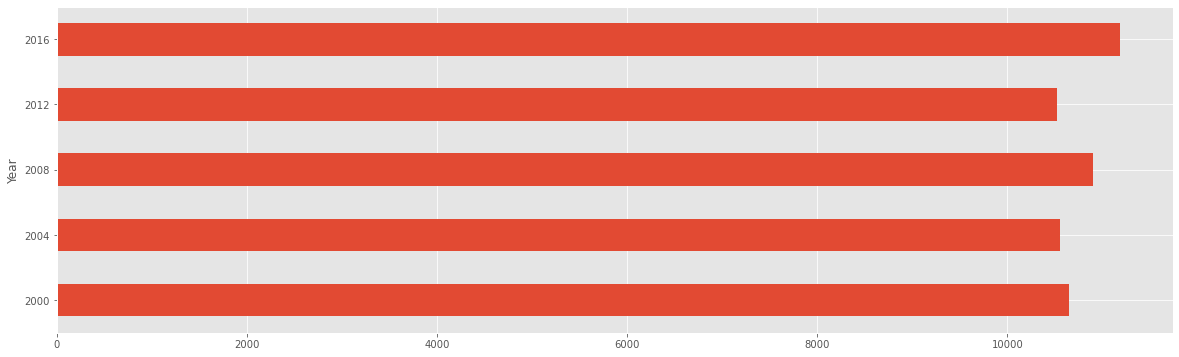

In [377]:
#How many Athletes participated per year
athletes_number = athletes_df.groupby('Year')['ID'].nunique()
plt.figure(figsize = (20,6))
sns.color_palette("pastel")
athletes_number.plot(kind = 'barh')

The Summer Olympics has amassed over 10000 athletes consistently for each event. We can see that in total, there were 67474 Athletes from 2000 - 2016 in the Summer Olympics, with 5 Olympics being held in the timeframe we can note that average athlete attendance was 13,494.8.

## 5. Distributions:

This section of the Exploratory Data Analysis will explore the various Distributions relative to the Summer Olympics in the timeframe 2000 - 2016. This section is divided up into the Male/Female Distribution, Age Distribution, Weight Distribution, Height Distribution and Participants Distribution by Country.

### 5.1 Male / Female Distribution

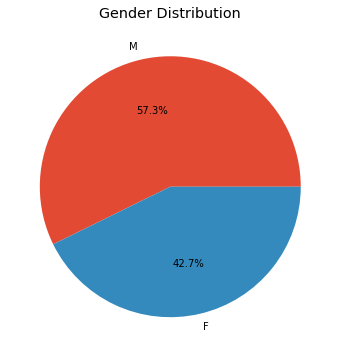

In [378]:
#Male/Female Distribution Pie Chart
gender_counts = athletes_df['Sex'].value_counts()
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
sns.color_palette("pastel")
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.show()

In The Summer Olympics 2000 - 2016, we can see that Male Classified Athletes accounted for 57.3% of the Athletes whilst Female Classified Athletes accounted for 42.7% of the Athletes.

In [347]:
gender_trend_df=athletes_df.groupby(['Sex','Year']).count().reset_index()
gender_trend_df.head(21)

,Sex,Year,ID,Name,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,Region,Notes
0,F,2000,5431,5431,5431,5431,5431,5431,5431,5431,5431,5431,5431,5431,5431,5431,5431
1,F,2004,5546,5546,5546,5546,5546,5546,5546,5546,5546,5546,5546,5546,5546,5546,5546
2,F,2008,5816,5816,5816,5816,5816,5816,5816,5816,5816,5816,5816,5816,5816,5816,5816
3,F,2012,5815,5815,5815,5815,5815,5815,5815,5815,5815,5815,5815,5815,5815,5815,5815
4,F,2016,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223
5,M,2000,8390,8390,8390,8390,8390,8390,8390,8390,8390,8390,8390,8390,8390,8390,8390
6,M,2004,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897
7,M,2008,7786,7786,7786,7786,7786,7786,7786,7786,7786,7786,7786,7786,7786,7786,7786
8,M,2012,7105,7105,7105,7105,7105,7105,7105,7105,7105,7105,7105,7105,7105,7105,7105
9,M,2016,7465,7465,7465,7465,7465,7465,7465,7465,7465,7465,7465,7465,7465,7465,7465


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

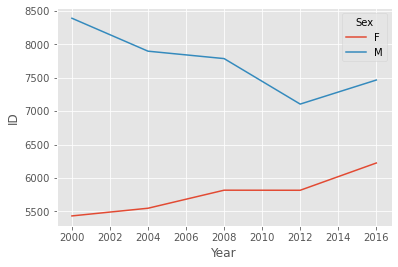

In [379]:
#line chart for amount of male and female athletes at the Olympics Events
line_colors = ["#0a2e36",'#27fb6b']
sns.lineplot(data=gender_trend_df, x = "Year", y = "ID", hue = "Sex")
sns.color_palette("pastel")

### 5.2 Age Distribution

<AxesSubplot:title={'center':'Athletes Age Distribution'}, xlabel='Age', ylabel='Number'>

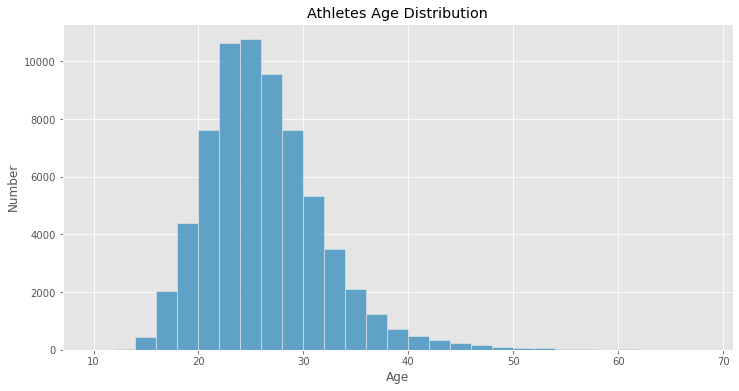

In [380]:
#Age Distribution in Summer Olympics 2000 - 2016 
plt.figure(figsize=(12,6))
plt.title('Athletes Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number')
sns.color_palette("pastel")
sns.histplot(data=athletes_df, x='Age', bins=np.arange(10,70,2))

### 5.3 Height Distribution

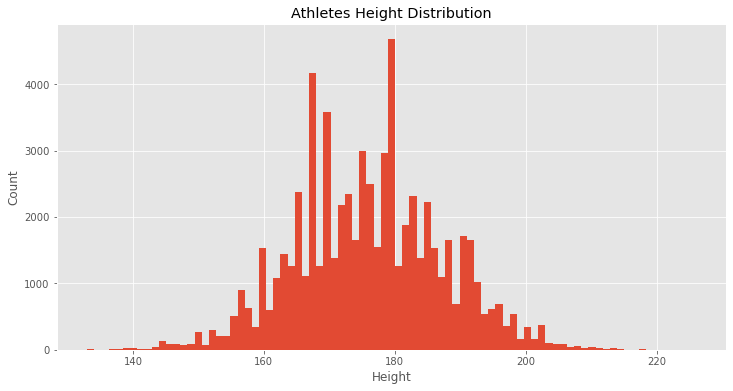

In [381]:
#Height Distribution in Summer Olympics 2000 - 2016
plt.figure(figsize = (12,6))
plt.hist(athletes_df['Height'], bins = 85)
plt.xlabel('Height')
plt.ylabel("Count")
sns.color_palette("pastel")
plt.title("Athletes Height Distribution")
plt.show()

### 5.4 Weight Distribution

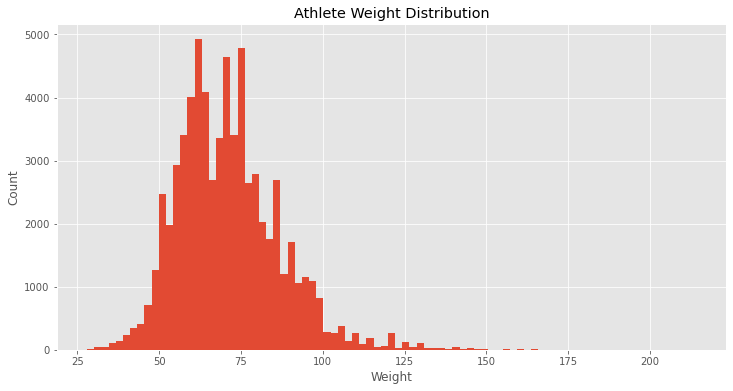

In [382]:
#Athlete Weight Distribution in Summer Olympics 2000 - 2016
plt.figure(figsize = (12,6))
plt.hist(athletes_df['Weight'], bins = 85)
plt.xlabel('Weight')
plt.ylabel('Count')
sns.color_palette("pastel")
plt.title("Athlete Weight Distribution")
plt.show()

### 5.5 Participant Distribution by Country:

In [352]:
#Number of Athletes per Country - Top 10
t_10_countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(10)
t_10_countries

United States    3566
Australia        2922
Russia           2714
Germany          2696
China            2536
Great Britain    2310
France           2286
Italy            2147
Japan            2026
Canada           1990
Name: Team, dtype: int64

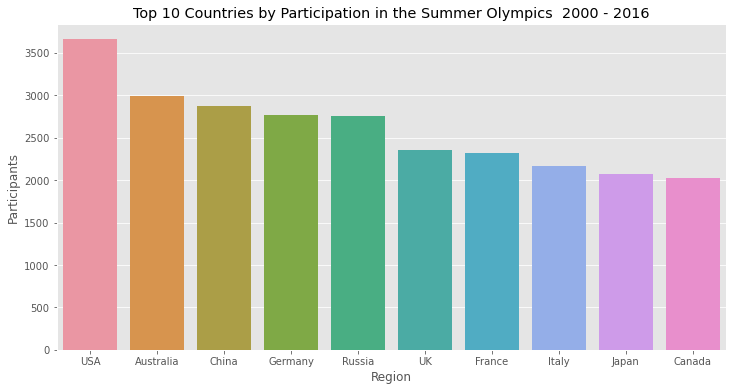

In [393]:
#Graph representing Athletes participating per country - Top 10
top_countries=athletes_df.groupby('Region')['Team'].count().nlargest(10).reset_index()
plt.figure(figsize = (12,6))
sns.barplot(x='Region',y='Team', data=top_countries)
plt.ylabel('Participants')
sns.color_palette("pastel")
plt.title('Top 10 Countries by Participation in the Summer Olympics  2000 - 2016')
plt.show()

## 6. Medal Distribution

This section will delve into the distribution of the Gold, Silver and Bronze Medals by Age. It is interesting to look into this as we will view the athletes that were able to achieve a Gold, Silver or Bronze Medal being aged over 40.

### 6.1 Gold Medal Distribution by Age:

In [354]:
#Gold Medals
gold_medals = athletes_df[(athletes_df.Medal == 'Gold')]

In [355]:
gold_medals = gold_medals[np.isfinite(gold_medals['Age'])]

In [291]:
#Gold Medals Count
gold_medals['ID'].count()

3295

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

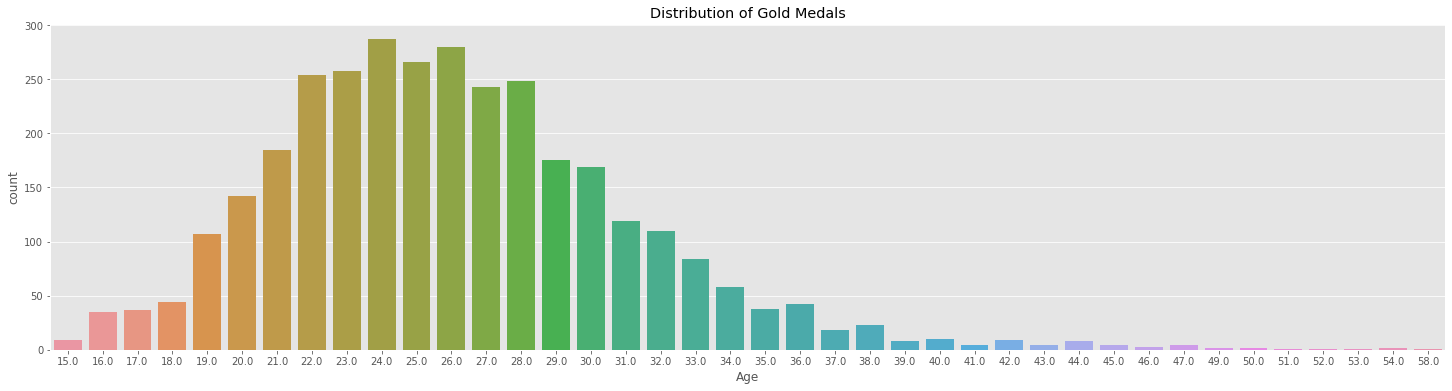

In [389]:
#gold medals bar graph for Age Distribution
plt.figure(figsize=(25,6))
sns.countplot(gold_medals['Age'],x='Age')
plt.title('Distribution of Gold Medals')
sns.color_palette("Set2")

From this analysis, we can see that majority of Gold Medals were won between the ages of 21 and 28. The youngest aged Gold Medal winner being 15 years old and we can see that there was a Gold Medal winner for a person aged 58. 

### 6.1.1 Gold Medal Distribution by Age 40 and Over:

In [251]:
over_40_golds = gold_medals['Sport'][gold_medals['Age'] >= 40]

In [250]:
#Gold Medals for Ages 40 and over
gold_medals['ID'][gold_medals['Age'] >= 40].count()

56

Text(0.5, 1.0, 'Gold Medals for Athletes Over 40')

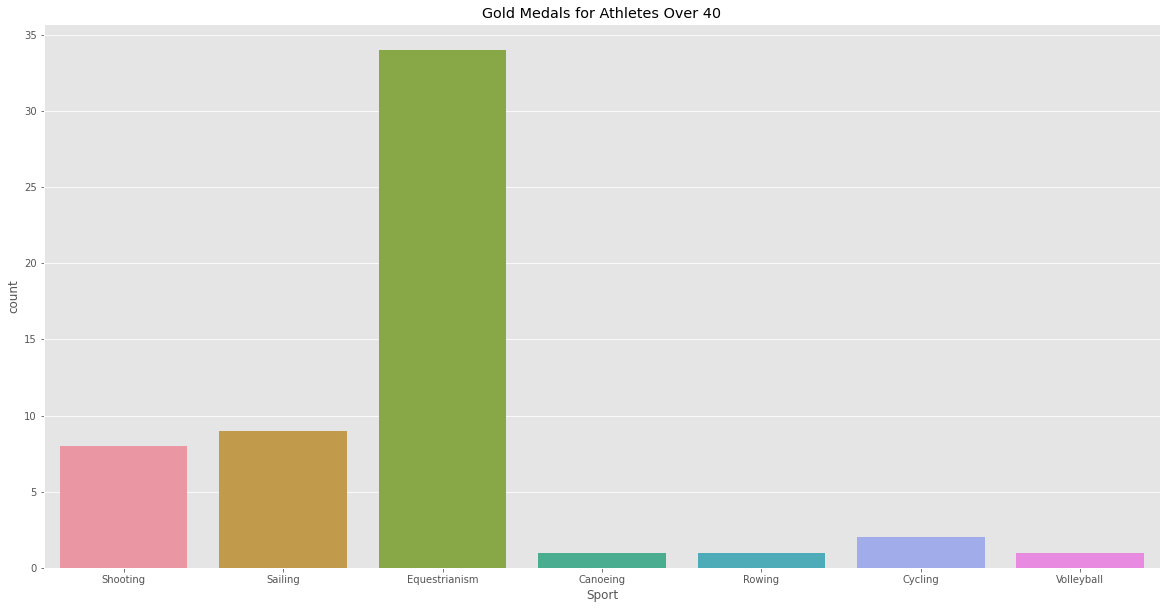

In [252]:
#Graph for events where gold was won for age 40 and over
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(over_40_golds)
plt.title('Gold Medals for Athletes Over 40')

It is interesting to note that the Gold Medal winners aged over 40 was domininant in the event of Equestianism Sport, with Sailing coming in Second and Shooting in Third. The total number of event categories for Gold Medal Winners Aged 40 and over was 7.

### 6.2 Silver Medal Distribution by Age

In [253]:
#Silver Medals
silver_medals = athletes_df[(athletes_df.Medal == 'Silver')]

In [254]:
silver_medals = silver_medals[np.isfinite(silver_medals['Age'])]

In [279]:
#Silver Medals Count
silver_medals['ID'].count()

3273

Text(0.5, 1.0, 'Distribution of Silver Medals')

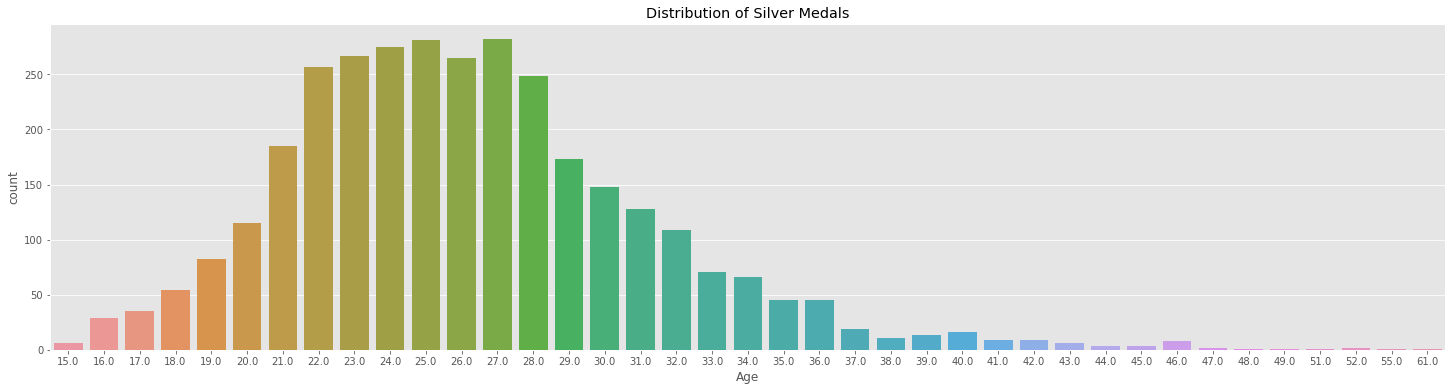

In [255]:
#silver medals bar graph for Age Distribution
plt.figure(figsize=(25,6))
sns.countplot(silver_medals['Age'], x='Age')
plt.title('Distribution of Silver Medals')

From this analysis, we can see that majority of Silver Medals were won between the ages of 22 and 28. The youngest aged Silver Medal winner being 15 years old and we can see that there was a Silver Medal winner for a person aged 61.

#### 6.2.1 Silver Medal Distribution by Age 40 and Over:

In [257]:
over_40_silvers = silver_medals['Sport'][silver_medals['Age'] >= 40]

In [256]:
#Silver Medals for Ages over 40
silver_medals['ID'][silver_medals['Age'] >= 40].count()

63

Text(0.5, 1.0, 'Silver Medals for Athletes Over 40')

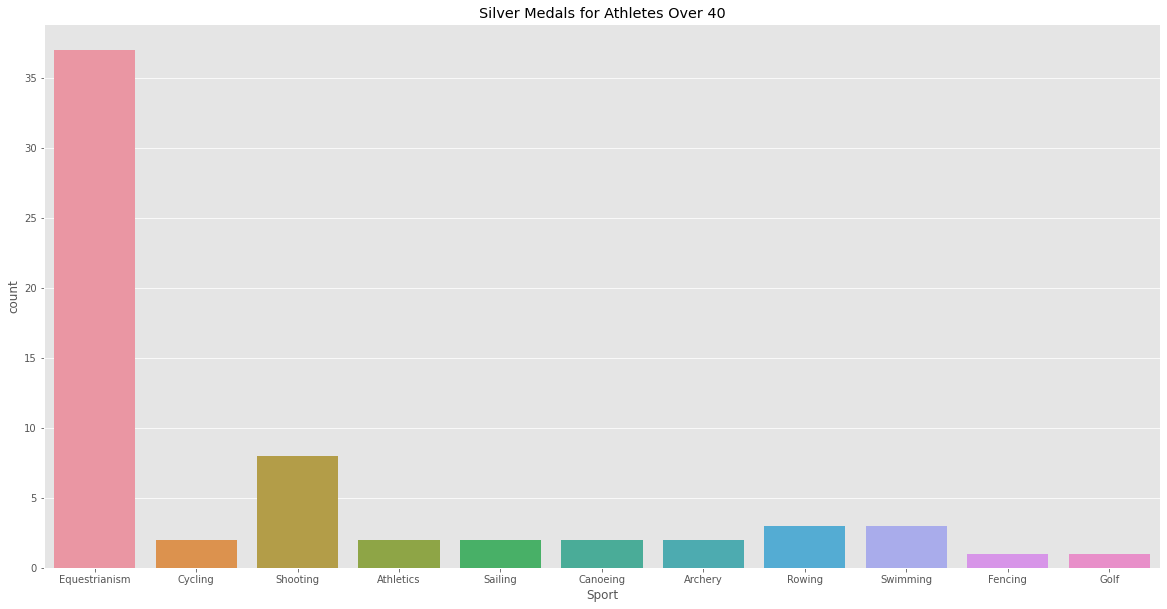

In [394]:
#Graph for events where gold was won for age over 40
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(over_40_silvers)
plt.title('Silver Medals for Athletes Over 40')

It is interesting to note that the Silver Medal winners aged over 40 was domininant in the event of Equestianism, with Shooting coming Second. Swimming and Rowing coming tied for third. An interesting aspect of the distribution of sport for the Aged 40 and olders in the Silver Medal category is the fact that there are 11 categories in which Silver Medals were won compared to Gold's 7. 

### 6.3 Bronze Medal Distribution by Age:

In [259]:
#Bronze Medals
bronze_medals = athletes_df[(athletes_df.Medal == 'Bronze')]

In [260]:
bronze_medals = bronze_medals[np.isfinite(bronze_medals['Age'])]

In [282]:
#Bronze Medals Count
bronze_medals['ID'].count()

3449

Text(0.5, 1.0, 'Distribution of Bronze Medals')

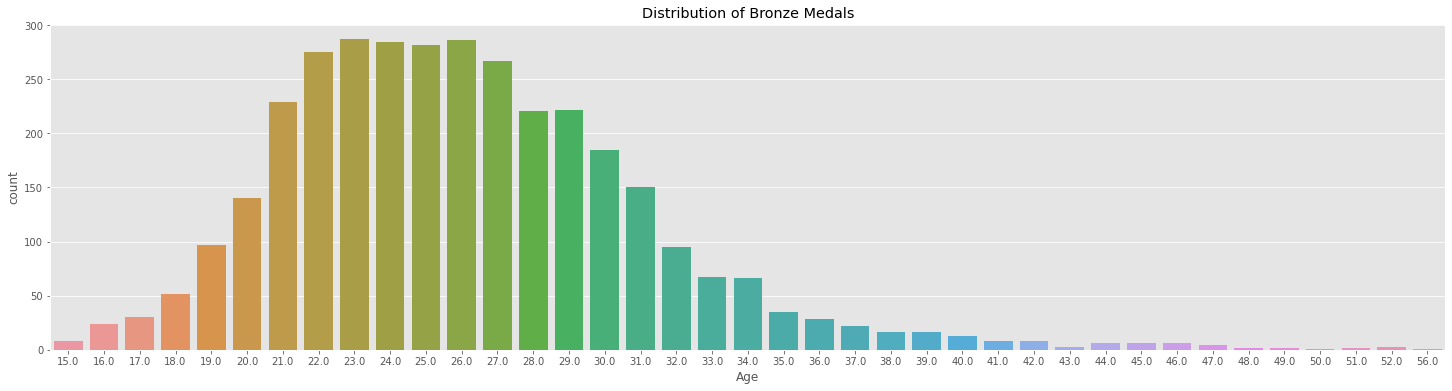

In [261]:
#bronze medals bar graph for Age Distribution
plt.figure(figsize=(25,6))
sns.countplot(bronze_medals['Age'],x='Age')
plt.title('Distribution of Bronze Medals')

From this analysis, we can see that majority of Bronze Medals were won between the ages of 21 and 30. The youngest aged Bronze Medal winner being 15 years old and we can see that there was a Bronze Medal winner for a person aged 56.

### 6.3.1 Bronze Medal Distribution by Age 40 and Over:

In [263]:
#create a dataframe for Over 40 bronze medals
over_40_bronzes = bronze_medals['Sport'][bronze_medals['Age'] >= 40]

In [287]:
#Bronze Medals for Ages over 40
bronze_medals['ID'][bronze_medals['Age'] >= 40].count()

65

Text(0.5, 1.0, 'Bronze Medals for Athletes Over 40')

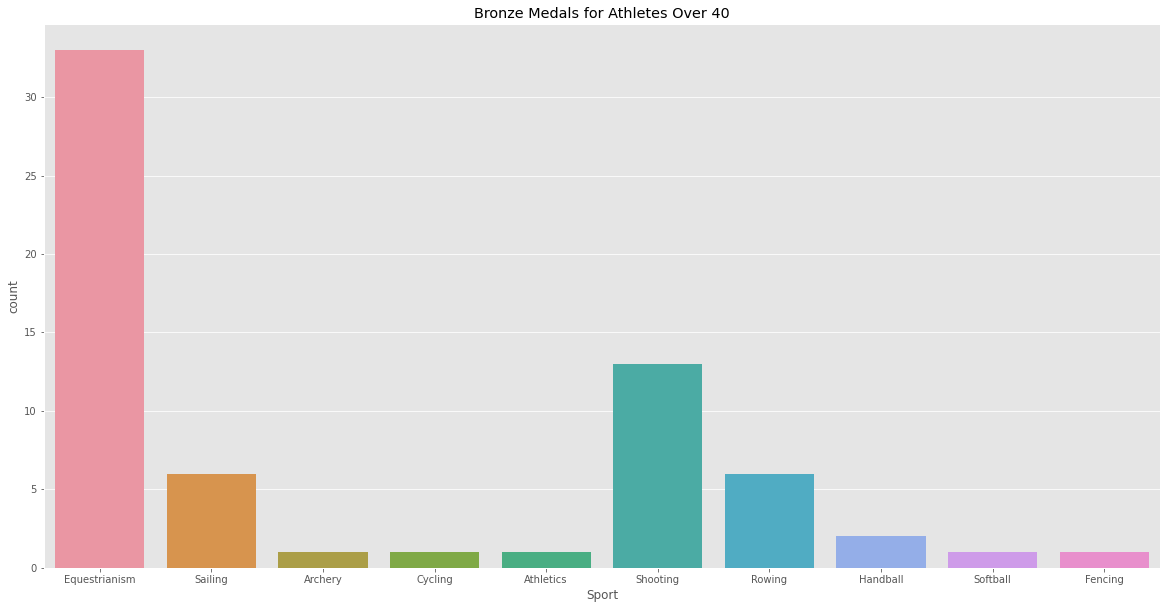

In [288]:
#Graph for events where bronze was won for age over 40
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(over_40_bronzes)
plt.title('Bronze Medals for Athletes Over 40')

Looking at the sport category distribution, we can see that Equestriansm was where most Bronze Medals for athletes aged 40 and over were achieved, followed by Shooting in Second place, whilst Rowing and Sailing shared third place. In total there were 10 sport categories were a Bronze Medal for a person aged 40 and over was achieved.  

## 7. Medals per Country

In [391]:
#Medals per country - Top 5
gold_medals.Region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,658
1,China,267
2,Russia,259
3,Germany,208
4,UK,182


Text(0.5, 1.0, 'Medals per Country')

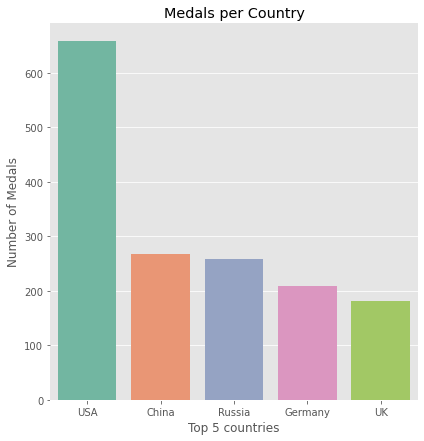

In [392]:
#bar graph for top 5 countries for medals won
total_gold_medals = gold_medals.Region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=total_gold_medals,
    height=6, kind="bar", palette="Set2")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

From the bar chart, we can clearly see that majority of medals were won by the U.S.A, with China coming second and Russia coming Third. What is interesting to note, is that the top 3 countries all have very large land masses in comparision to the 4th and 5th ranked countries for number of medals.

Out of the top 3 countries, the U.S.A has shown total domination amassing more medals than China and Russia combined. The U.S.A amassed 658 Medals from 2000 to 2016, whilst China and Russia combined amassed 526 medals from 2000 to 2016.

## 8. Top 5 Athletes:

### 8.1 Top 5 Male Athletes with most Medals:

An interesting aspect of the Olympics is to always look at which Athletes won the most medals in Olympics, and also which event category yielded the most medal winners. The first part will explore the Top 5 Most Medals for Male Athletes and the second part will explore the Top 5 Most Medals for Female Athletes.

In [395]:
#create the male athlete dataframe
data_M=athletes_df[athletes_df['Sex']=='M']

In [396]:
#gather the Male Athletes who won either Gold, Silver or Bronze and then display data for Name, Team, Sport and Amount (amount will be listed as ID)
topmale_df= data_M[(data_M['Medal']=="Gold")|(data_M['Medal']=="Silver")|(data_M['Medal']=="Bronze")].groupby(['Name',"Team","Sport"]).count().sort_values(by="ID",ascending=False).reset_index()
topmale_df[['Name', 'Team', 'Sport', 'ID']].head(5)

,Name,Team,Sport,ID
0,"Michael Fred Phelps, II",United States,Swimming,28
1,Ryan Steven Lochte,United States,Swimming,12
2,Ian James Thorpe,Australia,Swimming,9
3,Nathan Ghar-Jun Adrian,United States,Swimming,8
4,Bradley Marc Wiggins,Great Britain,Cycling,8


### 8.2 Top 5 Female Athletes with most Medals:

This part will look at the Top 5 Most Medals for Female Athletes.

In [325]:
#create the female athlete dataframe
data_F=athletes_df[athletes_df['Sex']=='F']

In [326]:
#gather the Female Athletes who won either Gold, Silver or Bronze and then display data for Name, Team, Sport and Amount (amount will be listed as ID)
topfemale_df= data_F[(data_F['Medal']=="Gold")|(data_F['Medal']=="Silver")|(data_F['Medal']=="Bronze")].groupby(['Name',"Team","Sport"]).count().sort_values(by="ID",ascending=False).reset_index()
topfemale_df[['Name', 'Team', 'Sport', 'ID']].head(5)

,Name,Team,Sport,ID
0,Natalie Anne Coughlin (-Hall),United States,Swimming,12
1,Leisel Marie Jones,Australia,Swimming,9
2,Allyson Michelle Felix,United States,Athletics,9
3,"Dara Grace Torres (-Hoffman, -Minas)",United States,Swimming,8
4,Katalin Kovcs,Hungary,Canoeing,8


<h3>Observations:</h3>

We can see that Michael Phelps from the U.S.A was the most dominant medal winner in the Olympics from 2000 - 2016 for both Male and Female. Michael Phelps was the most dominant Male Athlete, whilst Natalie Anne Coughlin was the most dominant Female Athlete. 

<h3>Interesting observations are as follows:</h3><br>

Swimming was the sport had that the Most Medal Winners in both Male and Female categories. <br>
Out of the Top 5 Male Medal Winners, Swimming was the sport for 4 of those 5. <br>
Out of the Top 5 Female Medal Winners, Swimming was the sport for 3 of those 5. <br>
U.S.A held 3 out of the 5 Top Medal Winners in the Male Category. <br>
U.S.A held 3 out of the 5 Top Medal Winners in the Female Category. <br>

## 9. Exploratory Data Analysis on Medals won for Aged Over 21 and Under 28:

### 9.1 Gold Medals Won:

In [305]:
#creating a dataframe for gold medal winners over 21 and under 28
o21_u28_golds = gold_medals['Sport'][gold_medals['Age'] > 21][gold_medals['Age'] < 28]

In [310]:
#Gold Medals for Ages over 21 and under 28
gold_medals['ID'][gold_medals['Age'] > 21][gold_medals['Age'] < 28].count()

1588

Text(0.5, 1.0, 'Gold Medals for Athletes > 21 and < 28')

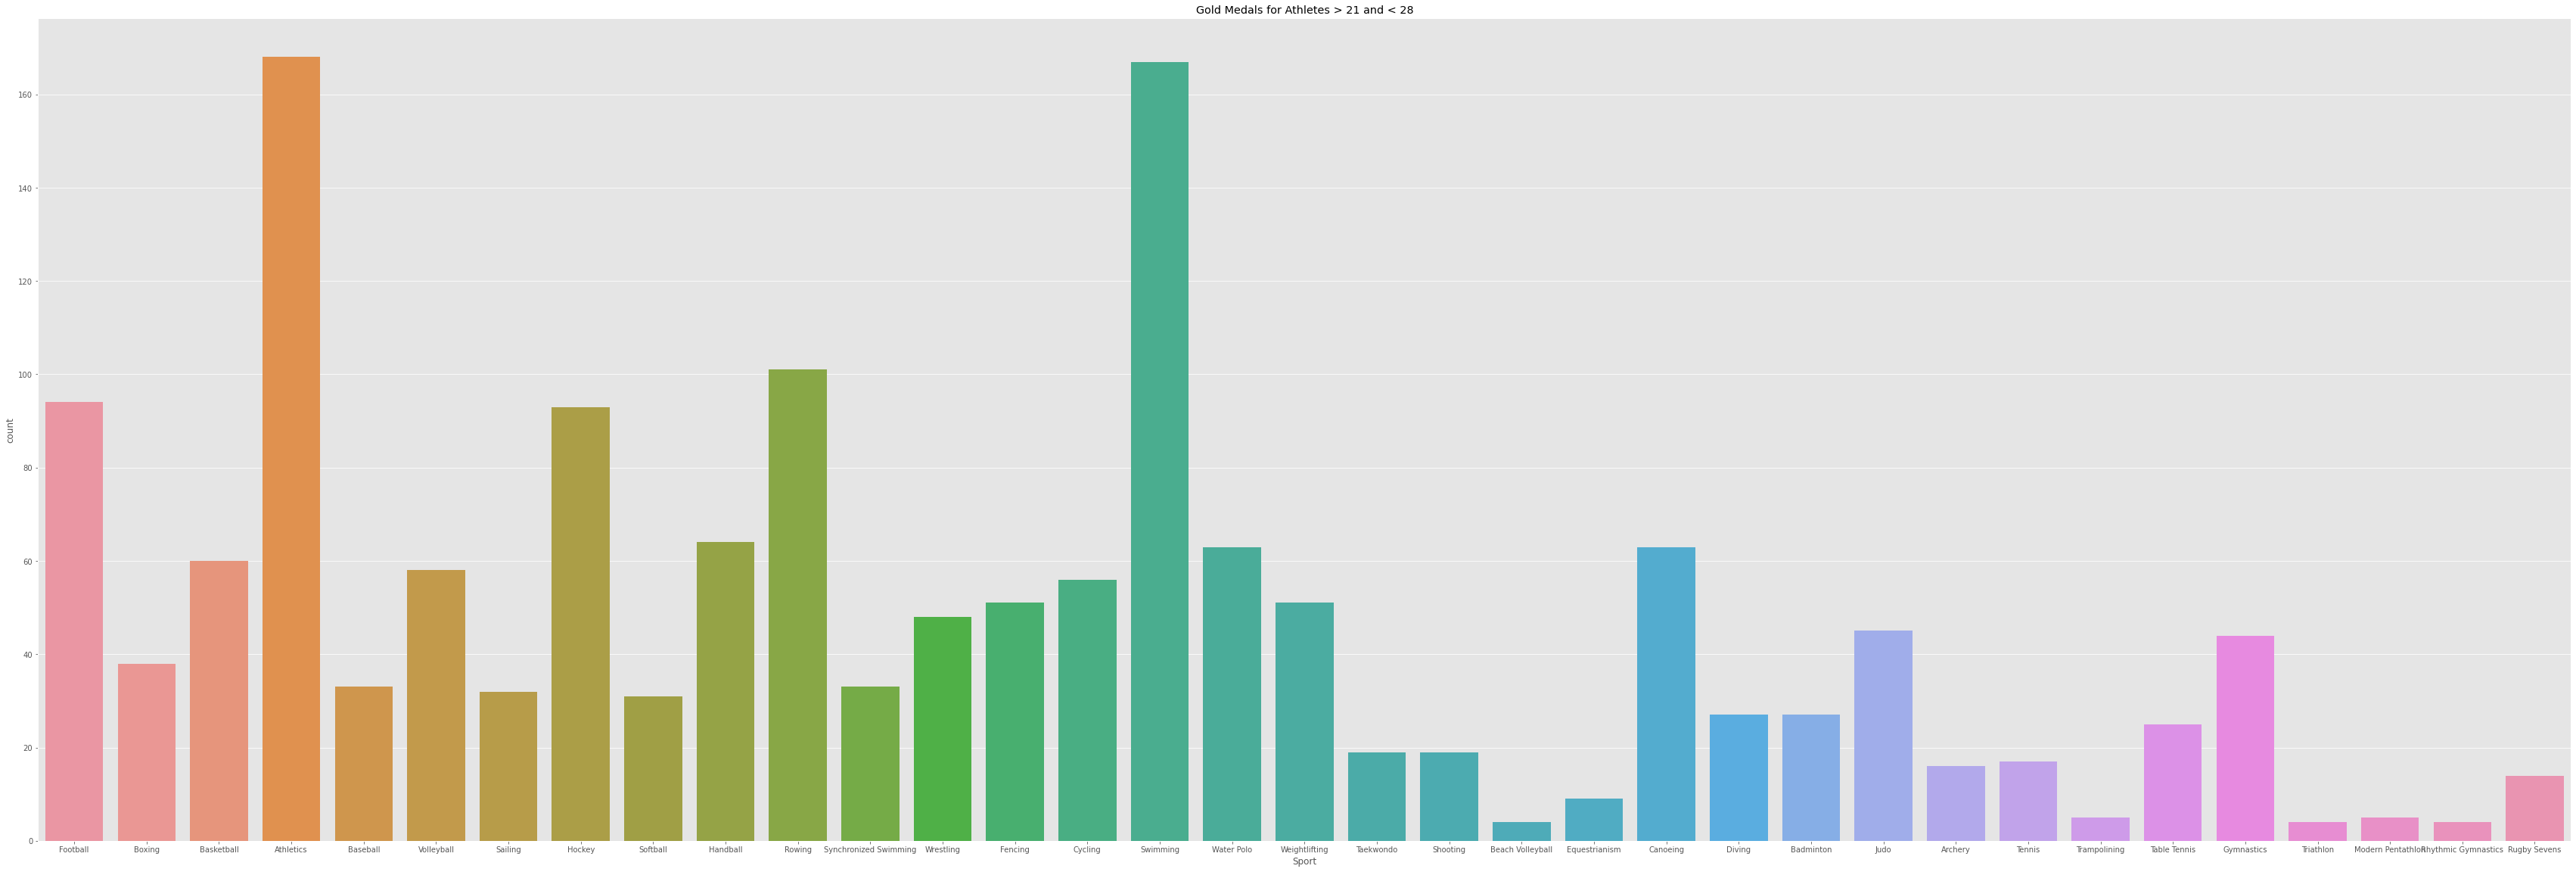

In [311]:
#Graph for events where gold was won for age over 21 and under 28
plt.figure(figsize=(60, 20))
sns.countplot(o21_u28_golds)
plt.title('Gold Medals for Athletes > 21 and < 28')

### 9.2 Silver Medals Won:

In [312]:
#creating a dataframe for silver medal winners over 21 and under 28
o21_u28_silver = silver_medals['Sport'][silver_medals['Age'] > 21][silver_medals['Age'] < 28]

In [313]:
#Silver Medals for Ages over 21 and under 28
silver_medals['ID'][silver_medals['Age'] > 21][silver_medals['Age'] < 28].count()

1627

Text(0.5, 1.0, 'Silver Medals for Athletes > 21 and < 28')

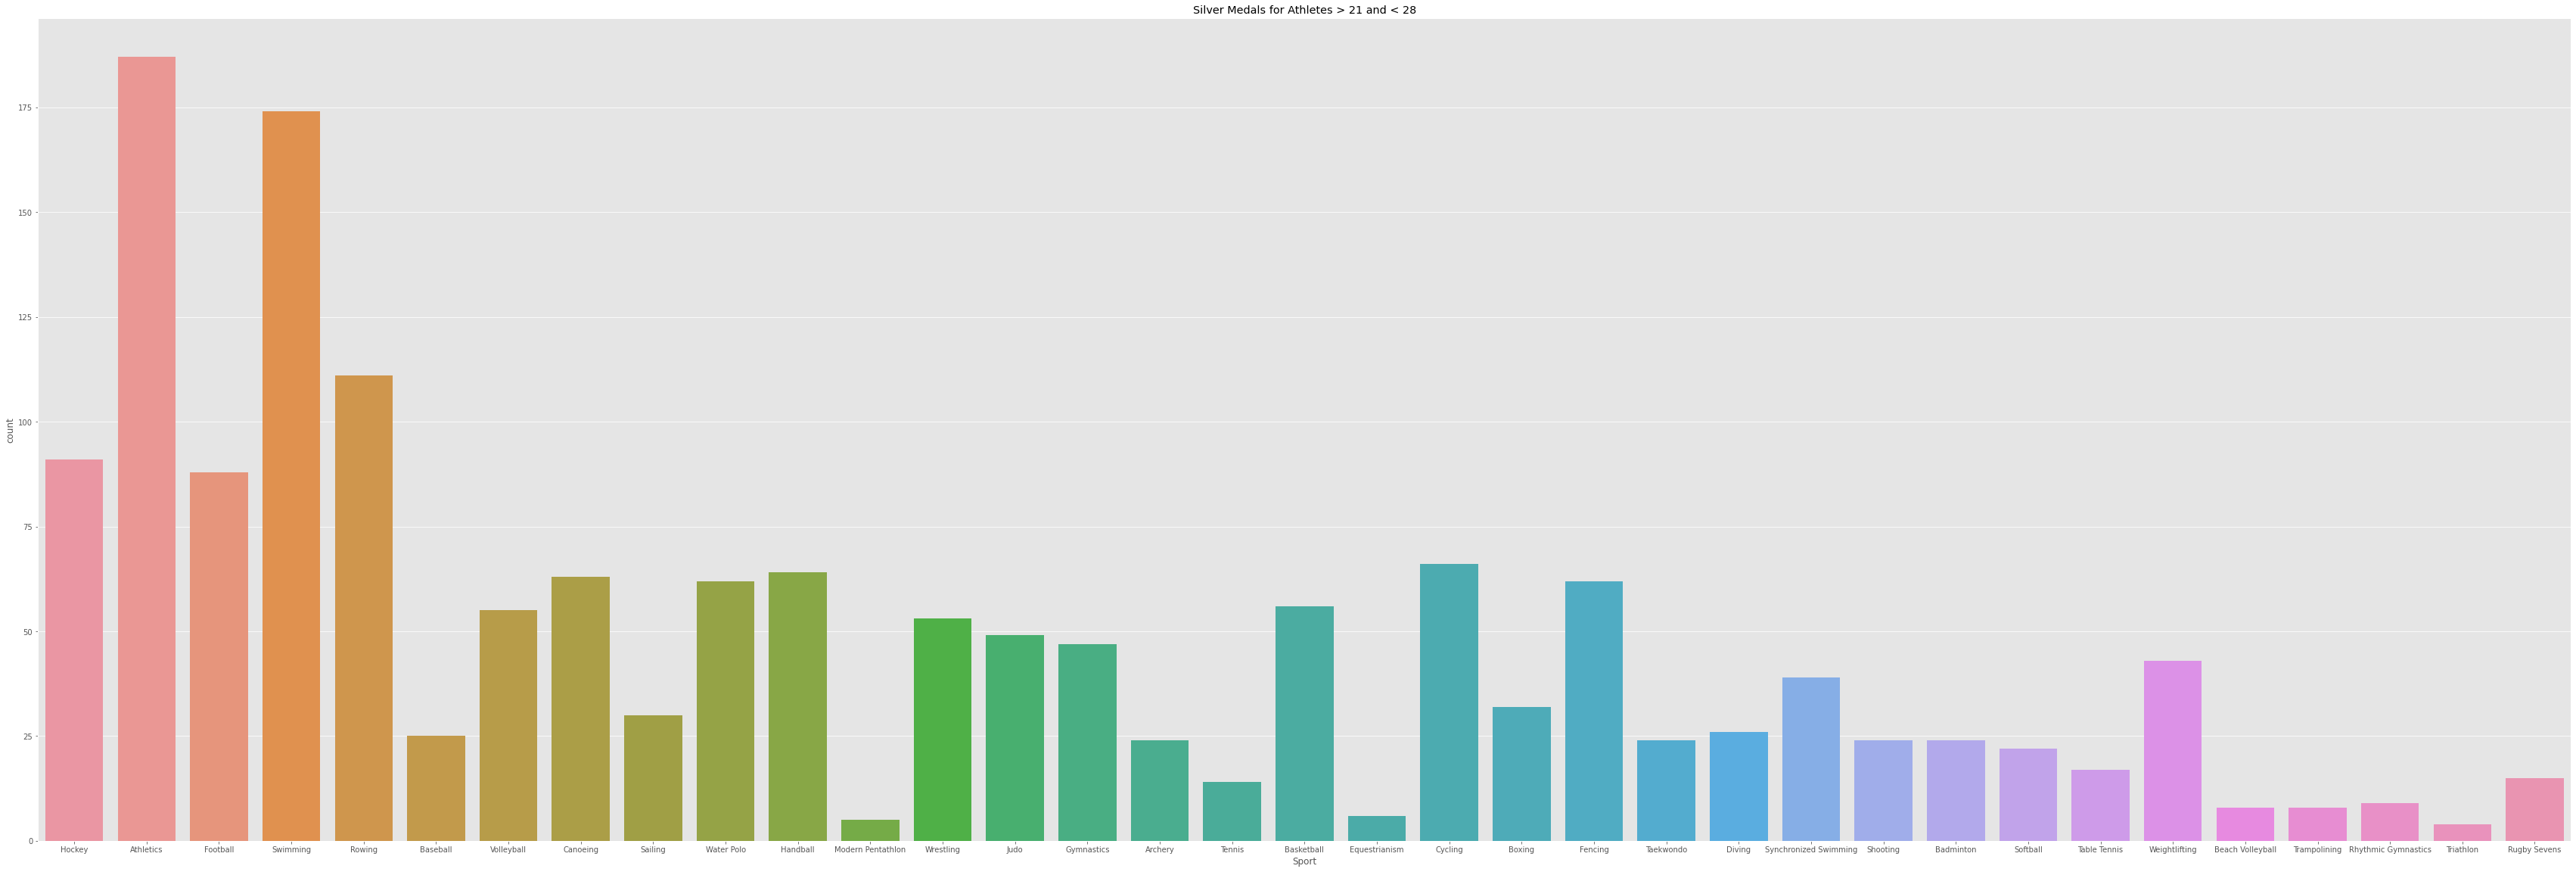

In [314]:
#Graph for events where silver was won for age over 21 and under 28
plt.figure(figsize=(60, 20))
sns.countplot(o21_u28_silver)
plt.title('Silver Medals for Athletes > 21 and < 28')

### 9.3 Bronze Medals Won:

In [315]:
#creating a dataframe for bronze medal winners over 21 and under 28
o21_u28_bronze = bronze_medals['Sport'][bronze_medals['Age'] > 21][bronze_medals['Age'] < 28]

In [318]:
#Bronze Medals for Ages over 21 and under 28
bronze_medals['ID'][bronze_medals['Age'] > 21][bronze_medals['Age'] < 28].count()

1681

Text(0.5, 1.0, 'Bronze Medals for Athletes > 21 and < 28')

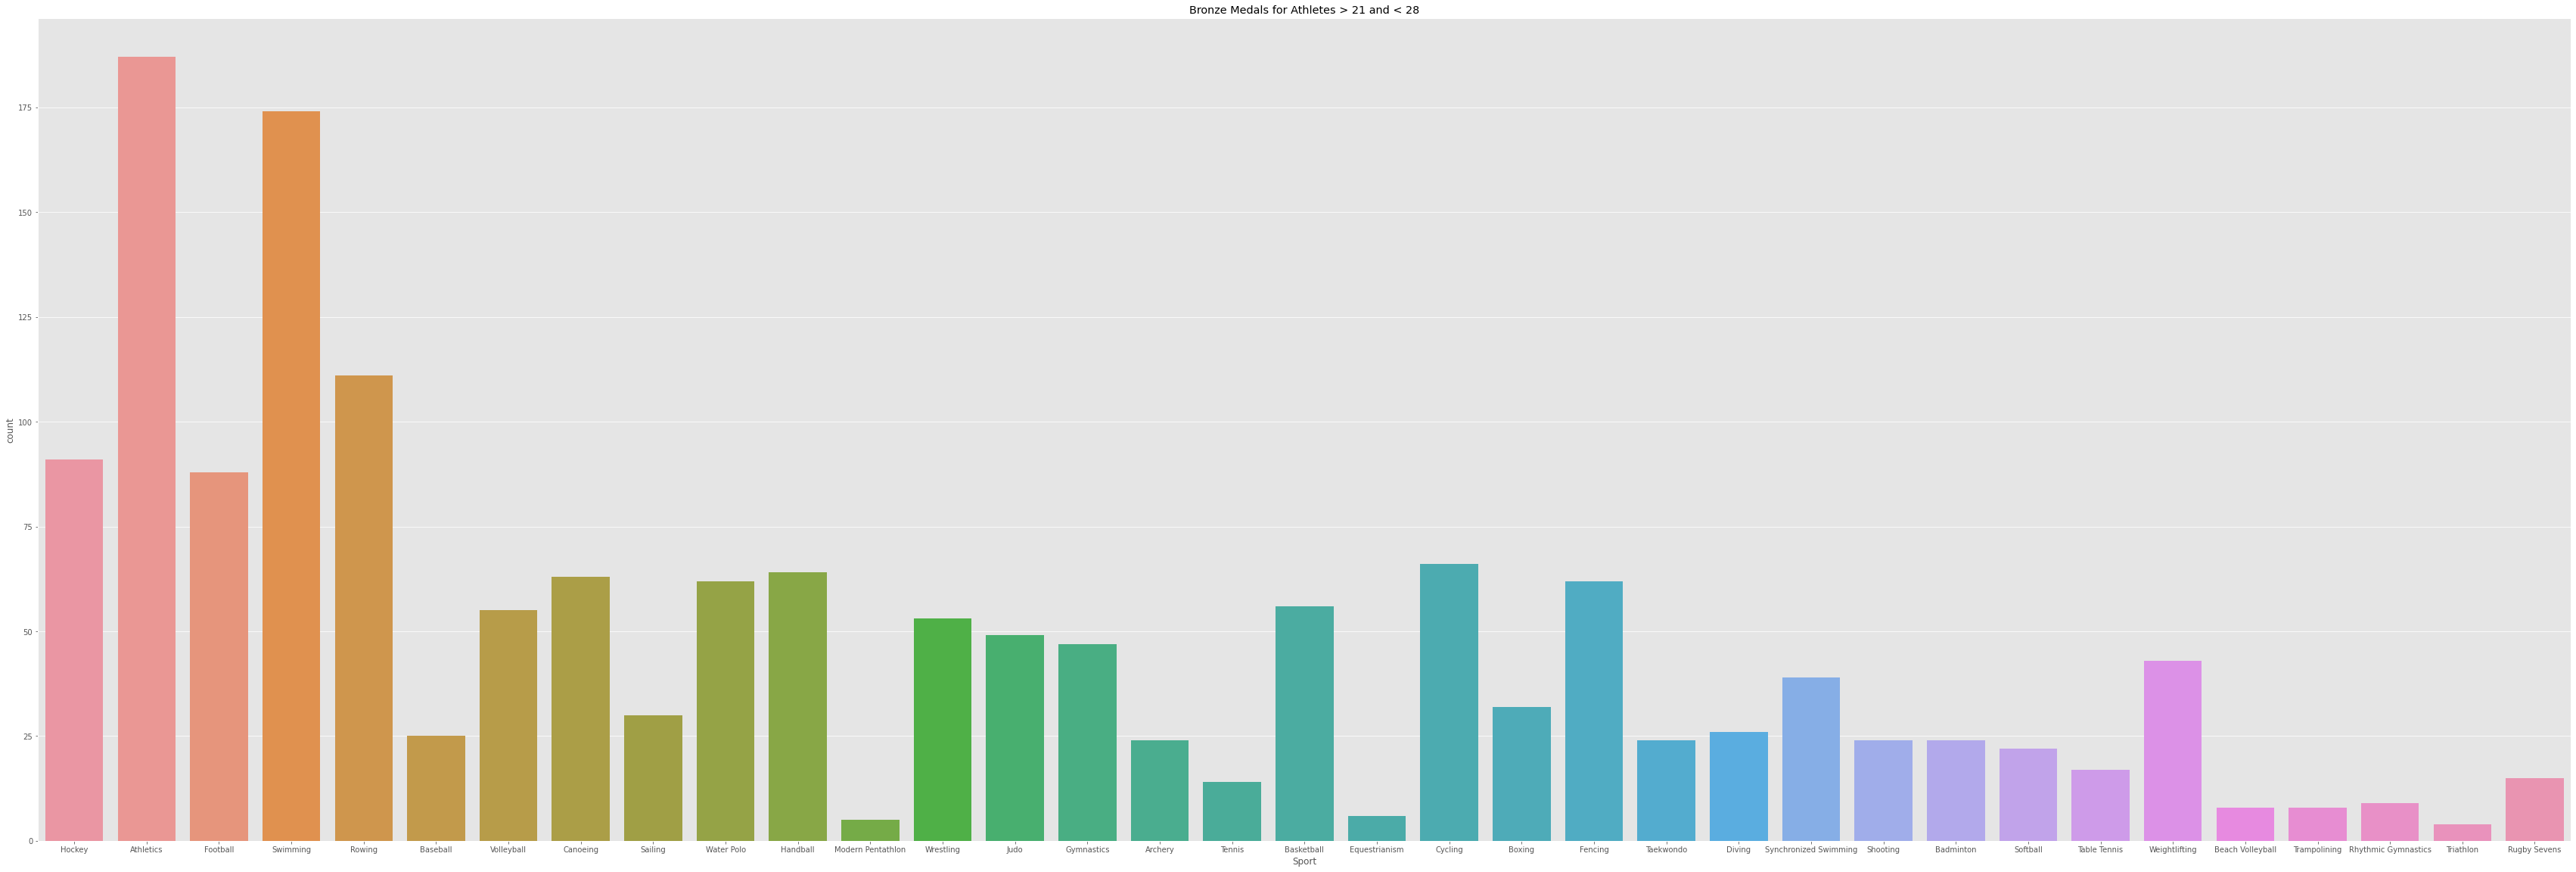

In [319]:
#Graph for events where bronze was won for age over 21 and under 28
plt.figure(figsize=(60, 20))
sns.countplot(o21_u28_bronze)
plt.title('Bronze Medals for Athletes > 21 and < 28')

## 10. Conclusion:

To go back to the questions posed as the beginning of this Exploratory Data Analysis, they were: 

1) Which country won the greatest number of medals? <br>
2) How many Gold, Silver and Bronze Medals did athletes Aged 40 and Over win? <br>
3) In which disciplines did these athletes win their medals? <br>
4) What was the split between Male and Female athletes in the Summer Olympics for this time period? <br>

<u><b>Question 1: Which country won the greatest number of medals?<b><br></u>

From the EPA, we can see that the United States of America won the greatest number of medals during the time period 2000 - 2016. In total, the U.S.A won 658, whilst second place China won 257 Medals. We can clearly establish that the U.S.A was the most dominant nation for their medal haul in the Summer Olympics from 2000 - 2016. 

<u><b>Question 2: How many Gold, Silver and Bronze Medals did athletes Aged 40 and Over win?</b><br></u>

This was an interesting part of the EPA to investigate as not many people would believe that in an abundance of Medals were won by athletes aged 40 and Over. 

Gold Medals: 56 Medals
Silver Medals: 63 Medals
Bronze Medals: 65 Medals

Interesting aspects to note was that in the medal haul for athletes aged 40 and over, Equestianism was the sporting category that had the most medals hauled in the Gold, Silver and Bronze categories.

<u><b>Question 3: In which disciplines did these athletes win their medals?<b><br></u>

Following on from question 2, question 3 was posed to understand which sporting disciplines were the medals won for athletes aged 40 and over. 

In the Gold Medals section, the top discipline was Equestianism, followed by Sailing and then Shooting.

In the Silver Medals section, the top discipline was Equestianism, followed by Swimming and then Shooting. 

In the Bronze Medals section, the top discipline was Equestianism, Shooting and then Rowing. 

An interesting aspect to note is that the disciplines of Equestianism, Shooting, Rowing, Swimming, Sailing all featured with a respective high medal haul. Could it be that these sports are able to offer the athletes who look to acheive medals past the age of 30 more of chance. It would be interesting to look at this with a wider EPA on the Summer Olympics Data ranging back from when the Olympics began to get a better data analysis of the results.

<u><b>Question 4: What was the split between Male and Female athletes in the Summer Olympics for this time period? <b><br></u>

A myth about the Summer Olympics that has been cropping up is that it is currently a Male-dominated competition. In this EPA, we can see that during the 2000 - 2016 era, the Summer Olympics has not been a male dominated sporting event. The percentage split for the events from 2000 - 2016 is as follows:

Male - 57.3%
Female - 42.7%

## 11. Criticisms:

Although this Exploratory Data Analysis used a wide range of Data from the Summer Olympics 2000 - 2016, this dataset is not a complete representation of the Summer Olympics as a whole. 

There has been 29 Summer Olympics Events, with the first event starting in 1896. I only analysed data from 2000 onwards, of which, I have analysed the 2000, 2004, 2008, 2012 and 2016 Summer Olympics. Understandably, the analysis and conclusions are only for the time period 2000 - 2016. I can ascertain that the Data if using the timeframe 1896 - 2020 would yield vastly different results in various categories and thus the answers to the questions posed would be vastly different (e.g. The split of Male to Female athletes would be different as well as the amount of Medals the U.S.A won in the Summer Olympics). 

With regards to the Summer Olympics Data from the CSV, we have not been able to get the metrics for every single athlete. In some regards, median Age, Weight and Height was used for Athletes who's data was unknown. This can skew the data and create a false narrative based on assumptions. 

Another critisim, and the main criticism of this Exploratory Data Analysis is that the Data obtained cannot be verified to the full extent. This is not the official data scraped from the Olympics, this is a dataset obtained by kaggle.com. Parts of this analysis will contain verifiable information (e.g. The Top Medal Winner for the Men was Michael Phelps) but other information may not be easily verifiable.

## 12. Ethics:

This data has been sourced from the website Kaggle.com. The link for the specific data is: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

This data has the Creative Commons CC0 1.0 Universal (CC0 1.0) Public Domain Dedication License. The information for this specific license is as follows:
"The person who associated a work with this deed has dedicated the work to the public domain by waiving all of his or her rights to the work worldwide under copyright law, including all related and neighboring rights, to the extent allowed by law.

You can copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission. See Other Information below." More information can be found at: https://creativecommons.org/publicdomain/zero/1.0/. 

A criticism of this data is the fact that a discrimination can be formed by harmful usage of this data. As it is able to compare the amount of medals obtained by different countries, genders, regions, this data can stem into heavy discrimations against regions, genders, participants, events and even hosts of the olympic event. This dataset could also have research summaries that produce harmful assumptions as the true accuracy of the data is not verifiable unless cross-referenced with the olympics official database. 

## 13. Modifications to Data:

The following modifications were completed on the dataset: 

Age Median Usage for NaN/unknowns values:
In the dataset, there were a few unknown values for olympians age. As I required the age to contain no unknown values, a median age was used in place of this. The NaN values amounted to 3, so i can safely say that the data is not skewed heavily by the usage of a median age. 

Weight Median Usage for NaN/unknowns values:
In the dataset, there were 905 NaN values for the weight column. This was cleaned by using a median weight to provide values to these unknown fields. A criticism of this is that the median weight would differ between male and female and thus the data for weight is skewed to allow for the weight column to have a value for every row. This is a criticism as the accuracy of Weight Distribution is inaccurate to account for the NaN values in the weight column.

Height Median Usage for NaN/unknowns values:
In the dataset there were 654 NaN values for Height. This was cleaned by using a median height to provide values to these unknown fields. A criticism of this is that the median height would differ between male and female and thus the data for height is skewed to allow for the weight column to have a value for every row. This is a criticism as the accuracy of height Distribution is inaccurate to account for the NaN values in the height column.

NaN values for Medals:
In the dataset, there were 57457 NaN values for the medals category. In the instance of this dataset, there are 4 outcomes: A gold medal, a silver medal, a bronze medal or no medal. The NaN values accounted for would be for the No Medal category but as this dataset is not verifiable, there could have been olympians whose medals were not accounted for and through data cleansing were assigned no medal won. This could skew the data, but majority of the NaN values in this case were for No medal won and thus would have a higher percentage of correct assignment than incorrect assignment.

## 14. References:

Data Collection:

Griffin, R., 2022. 120 years of Olympic history: athletes and results. [online] Kaggle.com. Available at: <https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results> [Accessed 6 June 2022].

Exploratory Data Analysis: <br>

<u><b>Pandas:</b></u><br>

Pandas.pydata.org. 2022. DataFrame — pandas 1.4.2 documentation. [online] Available at <https://pandas.pydata.org/docs/reference/frame.html> [Accessed 21 June 2022].
    
Pandas.pydata.org. 2022. pandas - Python Data Analysis Library. [online] Available at: <https://pandas.pydata.org/> [Accessed 21 June 2022].

Pandas.pydata.org. 2022. User Guide — pandas 1.4.2 documentation. [online] Available at: <https://pandas.pydata.org/docs/user_guide/index.html> [Accessed 21 June 2022].
    
<u><b>NumPy:</b></u><br>
GeeksforGeeks. 2022. How to access a NumPy array by column - GeeksforGeeks. [online] Available at: <https://www.geeksforgeeks.org/how-to-access-a-numpy-array-by-column/> [Accessed 21 June 2022].
    
Numpy.org. 2022. Array creation — NumPy v1.22 Manual. [online] Available at: <https://numpy.org/doc/stable/user/basics.creation.html> [Accessed 21 June 2022].

<u><b>Matplotlib:</b></u><br>
Matplotlib.org. 2022. bar(x, height) / barh(y, width) — Matplotlib 3.5.2 documentation. [online] Available at: <https://matplotlib.org/stable/plot_types/basic/bar.html#sphx-glr-plot-types-basic-bar-py> [Accessed 21 June 2022].

Matplotlib.org. 2022. hist(x) — Matplotlib 3.5.2 documentation. [online] Available at: <https://matplotlib.org/stable/plot_types/stats/hist_plot.html> [Accessed 21 June 2022].

Matplotlib. Customizing Matplotlib with style sheets and rcParams [Online]. Available: https://matplotlib.org/stable/tutorials/introductory/customizing.html

<u><b>Seaborn:</b></u><br>
Seaborn.pydata.org. 2022. Plotting with categorical data — seaborn 0.11.2 documentation. [online] Available at: <https://seaborn.pydata.org/tutorial/categorical.html> [Accessed 21 June 2022].

Seaborn.pydata.org. 2022. Choosing color palettes — seaborn 0.11.2 documentation. [online] Available at: <https://seaborn.pydata.org/tutorial/color_palettes.html> [Accessed 21 June 2022].

Seaborn.pydata.org. 2022. seaborn.countplot — seaborn 0.11.2 documentation. [online] Available at: <https://seaborn.pydata.org/generated/seaborn.countplot.html> [Accessed 21 June 2022].

Seaborn.pydata.org. 2022. seaborn.catplot — seaborn 0.11.2 documentation. [online] Available at: <https://seaborn.pydata.org/generated/seaborn.catplot.html?highlight=catplot#seaborn.catplot> [Accessed 21 June 2022].

K. Fessel. (2020, June 29). Introduction to Seaborn YouTube series [Online]. Available: https://www.youtube.com/playlist?list=PLtPIclEQf-3cG31dxSMZ8KTcDG7zYng1j

<u><b>Jupyter Notebook:</b></u><br>

Wijaya, C., 2022. Jupyter Notebook to PDF in a few lines. [online] Medium. Available at: <https://towardsdatascience.com/jupyter-notebook-to-pdf-in-a-few-lines-3c48d68a7a63> [Accessed 21 June 2022].

Jupyter-notebook.readthedocs.io. 2022. User interface components — Jupyter Notebook 6.4.12 documentation. [online] Available at: <https://jupyter-notebook.readthedocs.io/en/stable/ui_components.html> [Accessed 21 June 2022].

GeeksforGeeks. 2022. Insert Image in a Jupyter Notebook - GeeksforGeeks. [online] Available at: <https://www.geeksforgeeks.org/insert-image-in-a-jupyter-notebook/#:~:text=Method%201%3A%20Direct%20insertion%20using%20the%20edit%20menu&text=first%2C%20change%20the%20type%20of,Edit%20%2D%3E%20insert%20image.> [Accessed 21 June 2022].